# Membuat Agregat Data Customer

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
686        18077       1        16   15028000
687        18079       1        24    3816000
688        18082       1         2    2090000
689        18088       1         1     590000
692        18123       1         3    2220000

[711 rows x 4 columns]


# Membuat Histogram part 1

<Figure size 432x288 with 0 Axes>

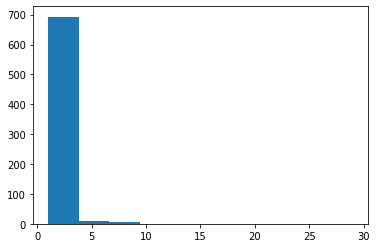

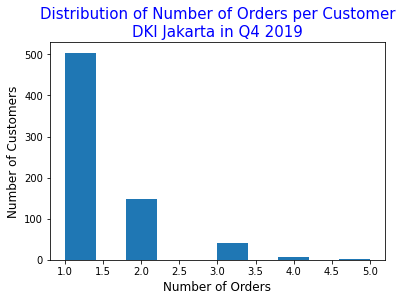

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

# Membuat histogram part 2

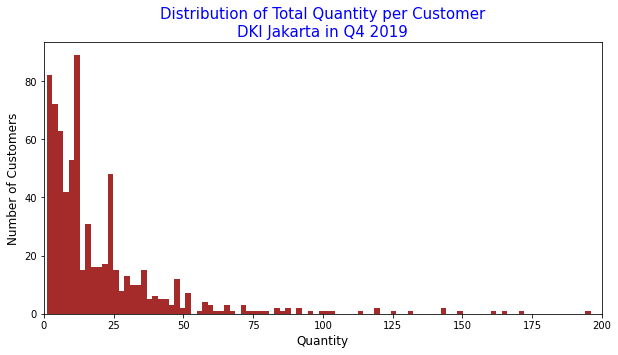

In [11]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200)
plt.show()

# Membuat histogram part 3

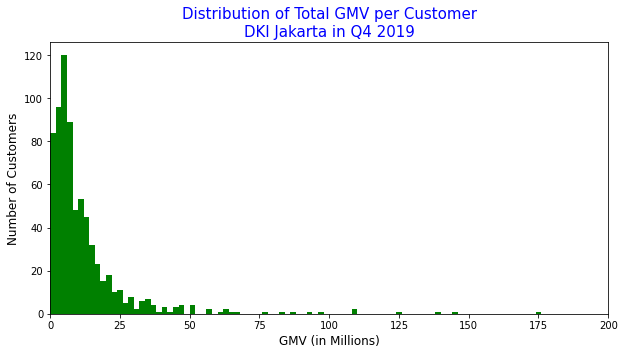

In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

# Membuat scatterplot

<Figure size 432x288 with 0 Axes>

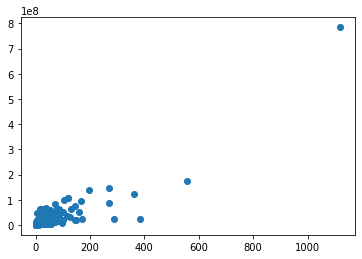

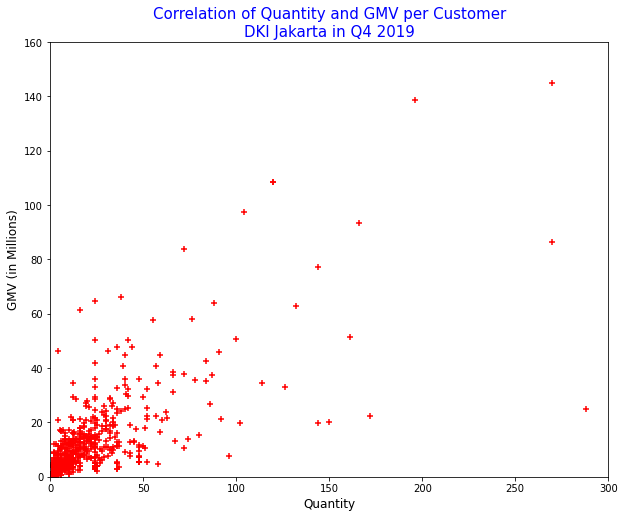

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+',color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()